# Install

## pip install

In [19]:
!pip install tensorflow scikit-learn

In [20]:
!pip install tensorflow

In [22]:
!pip install --upgrade keras

## import

In [2]:
'''TensorFlow'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adagrad, RMSprop, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.layers import BatchNormalization, Dropout
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from keras.wrappers.scikit_learn import KerasClassifier

# from tensorflow.keras.datasets import fashion_mnist

'''Main'''
import numpy as np
import pandas as pd
from sklearn.manifold import MDS

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
# keras.datasets.fashion_mnist.load_data()

# Fashion_mnist preprocessing

In [4]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import fashion_mnist


In [5]:

# >>>  v_1
# Завантаження даних
# mnist = tf.keras.datasets.fashion_mnist

# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images, test_images = train_images / 255.0, test_images / 255.0

# >>>  v_2
# Завантаження даних
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Перетворення форми зображень
train_images = np.reshape(train_images, newshape=(train_images.shape[0], 28, 28, 1))
test_images = np.reshape(test_images, newshape=(test_images.shape[0], 28, 28, 1))

# Нормалізація пікселів у діапазоні [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print(train_images.shape)
print(train_labels.shape)

train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(60000, 10)
(10000, 10)


# Model

In [7]:
# Створення та компіляція моделі
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:

# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.1),

#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.15),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Adam

In [12]:

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_adam = model
history_adam = model_adam.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=None,
                    validation_split=0.2,
                              verbose = 2)

# Тренування моделі
# model_adam.fit(train_images, train_labels, epochs=10)

# Оцінка моделі на тестових даних
test_loss_adam, test_acc_adam = model_adam.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc_adam)

Epoch 1/10
1500/1500 - 10s - loss: 0.1721 - accuracy: 0.9350 - val_loss: 0.3132 - val_accuracy: 0.8957 - 10s/epoch - 7ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.1674 - accuracy: 0.9378 - val_loss: 0.3050 - val_accuracy: 0.9002 - 4s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.1621 - accuracy: 0.9399 - val_loss: 0.3226 - val_accuracy: 0.8969 - 4s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 5s - loss: 0.1574 - accuracy: 0.9423 - val_loss: 0.3211 - val_accuracy: 0.8982 - 5s/epoch - 4ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.1553 - accuracy: 0.9425 - val_loss: 0.3433 - val_accuracy: 0.8913 - 4s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.1500 - accuracy: 0.9442 - val_loss: 0.3363 - val_accuracy: 0.8951 - 4s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 5s - loss: 0.1491 - accuracy: 0.9438 - val_loss: 0.3486 - val_accuracy: 0.8957 - 5s/epoch - 4ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.1455 - accuracy: 0.9463 - val_loss: 0.3543 - val_accuracy: 0.8953 - 4s/epoch - 3ms/step
Epoch 

In [13]:
train_loss, train_accuracy = model_adam.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_accuracy)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1721 - accuracy: 0.9407
Точність на тренувальних даних: 0.9406999945640564


# Model editing

In [ ]:
# Створення та компіляція моделі
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28,1)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     # tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

In [111]:
print("Розмірність міток для навчальних даних:", train_labels.shape)
print("Розмірність міток для тестових даних:", test_labels.shape)

Розмірність міток для навчальних даних: (60000, 10)
Розмірність міток для тестових даних: (10000, 10)


In [112]:
train_labels_int = np.argmax(train_labels, axis=1)
test_labels_int = np.argmax(test_labels, axis=1)

# Callbacks

In [17]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
# Створення callback-функції ModelCheckpoint

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                                          monitor='val_accuracy',
                                                          save_best_only=True,
                                                          verbose=1)
model_Callbacks = model
# Тренування моделі з використанням ModelCheckpoint
history_Callbacks = model_Callbacks.fit(train_images, train_labels,
                                        epochs=10, batch_size = None, verbose = 2,
          validation_data=(test_images, test_labels),
          callbacks=[checkpoint_callback])

best_model = tf.keras.models.load_model('best_model.keras')

# Оцінка найкращої моделі на тестових даних
test_loss_best, test_accuracy_best = best_model.evaluate(test_images, test_labels)
print("Втрати на тестових даних (найкраща модель):", test_loss_best)
print("Точність на тестових даних (найкраща модель):", test_accuracy_best)

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.88270, saving model to best_model.keras
1875/1875 - 7s - loss: 0.1826 - accuracy: 0.9367 - val_loss: 0.4280 - val_accuracy: 0.8827 - 7s/epoch - 4ms/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.88270 to 0.88430, saving model to best_model.keras
1875/1875 - 7s - loss: 0.1720 - accuracy: 0.9384 - val_loss: 0.4026 - val_accuracy: 0.8843 - 7s/epoch - 4ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.88430
1875/1875 - 5s - loss: 0.1635 - accuracy: 0.9400 - val_loss: 0.4103 - val_accuracy: 0.8815 - 5s/epoch - 3ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.88430
1875/1875 - 6s - loss: 0.1577 - accuracy: 0.9428 - val_loss: 0.4129 - val_accuracy: 0.8833 - 6s/epoch - 3ms/step
Epoch 5/10

Epoch 5: val_accuracy improved from 0.88430 to 0.88930, saving model to best_model.keras
1875/1875 - 5s - loss: 0.1522 - accuracy: 0.9441 - val_loss: 0.4023 - val_accuracy: 0.8893 - 5s/epoch - 3ms/step
Epoch 6/1

In [18]:
train_loss_best, train_accuracy_best = best_model.evaluate(train_images, train_labels)
print("Точність на тренувальних даних (найкраща модель):", train_accuracy_best)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1340 - accuracy: 0.9506
Точність на тренувальних даних (найкраща модель): 0.9505833387374878


# RMSProp

In [41]:

#optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.01, rho=0.95)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005, rho=0.95)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_RMSProp = model
history_RMSProp = model_RMSProp.fit(train_images, train_labels, epochs=10, batch_size = 32, verbose = 2, validation_split=0.1)

test_loss_RMSProp, test_acc_RMSProp = model_RMSProp.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc_RMSProp)

Epoch 1/10
1688/1688 - 14s - loss: 0.2617 - accuracy: 0.9197 - val_loss: 0.5877 - val_accuracy: 0.8878 - 14s/epoch - 8ms/step
Epoch 2/10
1688/1688 - 5s - loss: 0.2534 - accuracy: 0.9210 - val_loss: 0.5543 - val_accuracy: 0.8775 - 5s/epoch - 3ms/step
Epoch 3/10
1688/1688 - 4s - loss: 0.2446 - accuracy: 0.9221 - val_loss: 0.6148 - val_accuracy: 0.8842 - 4s/epoch - 2ms/step
Epoch 4/10
1688/1688 - 4s - loss: 0.2525 - accuracy: 0.9228 - val_loss: 0.5367 - val_accuracy: 0.8845 - 4s/epoch - 2ms/step
Epoch 5/10
1688/1688 - 5s - loss: 0.2478 - accuracy: 0.9220 - val_loss: 0.5707 - val_accuracy: 0.8807 - 5s/epoch - 3ms/step
Epoch 6/10
1688/1688 - 4s - loss: 0.2484 - accuracy: 0.9230 - val_loss: 0.6024 - val_accuracy: 0.8932 - 4s/epoch - 2ms/step
Epoch 7/10
1688/1688 - 4s - loss: 0.2447 - accuracy: 0.9243 - val_loss: 0.5704 - val_accuracy: 0.8817 - 4s/epoch - 2ms/step
Epoch 8/10
1688/1688 - 5s - loss: 0.2408 - accuracy: 0.9247 - val_loss: 0.5559 - val_accuracy: 0.8797 - 5s/epoch - 3ms/step
Epoch 

In [43]:
train_loss_RMSProp, train_acc_RMSProp = model_RMSProp.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc_RMSProp)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2636 - accuracy: 0.9188
Точність на тренувальних даних: 0.918833315372467


# Adadelta

In [44]:

#optimizer = tf.keras.optimizers.experimental.Adadelta(learning_rate=1.0)
optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.005, rho = 0.95)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_Adadelta = model
history_Adadelta = model_Adadelta.fit(train_images, train_labels, epochs=10, batch_size = 32, verbose = 2, validation_split=0.1)

test_loss_Adadelta, test_acc_Adadelta = model_Adadelta.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc_Adadelta)

Epoch 1/10
1688/1688 - 6s - loss: 0.2198 - accuracy: 0.9239 - val_loss: 0.6156 - val_accuracy: 0.8827 - 6s/epoch - 4ms/step
Epoch 2/10
1688/1688 - 6s - loss: 0.2134 - accuracy: 0.9260 - val_loss: 0.6079 - val_accuracy: 0.8830 - 6s/epoch - 3ms/step
Epoch 3/10
1688/1688 - 5s - loss: 0.2079 - accuracy: 0.9275 - val_loss: 0.6012 - val_accuracy: 0.8838 - 5s/epoch - 3ms/step
Epoch 4/10
1688/1688 - 6s - loss: 0.2031 - accuracy: 0.9289 - val_loss: 0.5954 - val_accuracy: 0.8843 - 6s/epoch - 3ms/step
Epoch 5/10
1688/1688 - 5s - loss: 0.1990 - accuracy: 0.9302 - val_loss: 0.5901 - val_accuracy: 0.8848 - 5s/epoch - 3ms/step
Epoch 6/10
1688/1688 - 5s - loss: 0.1953 - accuracy: 0.9314 - val_loss: 0.5855 - val_accuracy: 0.8860 - 5s/epoch - 3ms/step
Epoch 7/10
1688/1688 - 6s - loss: 0.1924 - accuracy: 0.9324 - val_loss: 0.5818 - val_accuracy: 0.8868 - 6s/epoch - 4ms/step
Epoch 8/10
1688/1688 - 5s - loss: 0.1899 - accuracy: 0.9333 - val_loss: 0.5784 - val_accuracy: 0.8873 - 5s/epoch - 3ms/step
Epoch 9/

In [45]:
train_loss_Adadelta, train_acc_Adadelta = model_Adadelta.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc_Adadelta)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2238 - accuracy: 0.9298
Точність на тренувальних даних: 0.9298499822616577


# Adagrad

In [46]:

#optimizer = tf.keras.optimizers.experimental.Adagrad(learning_rate=0.01)
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_Adagrad = model
history_Adagrad = model_Adagrad.fit(train_images, train_labels, epochs=10, batch_size = None, verbose = 2, validation_split=0.1)

test_loss_Adagrad, test_acc_Adagrad = model_Adagrad.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc_Adagrad)

Epoch 1/10
1688/1688 - 9s - loss: 0.1681 - accuracy: 0.9386 - val_loss: 0.5224 - val_accuracy: 0.8922 - 9s/epoch - 5ms/step
Epoch 2/10
1688/1688 - 5s - loss: 0.1582 - accuracy: 0.9407 - val_loss: 0.5169 - val_accuracy: 0.8938 - 5s/epoch - 3ms/step
Epoch 3/10
1688/1688 - 5s - loss: 0.1549 - accuracy: 0.9420 - val_loss: 0.5164 - val_accuracy: 0.8933 - 5s/epoch - 3ms/step
Epoch 4/10
1688/1688 - 4s - loss: 0.1531 - accuracy: 0.9424 - val_loss: 0.5121 - val_accuracy: 0.8950 - 4s/epoch - 2ms/step
Epoch 5/10
1688/1688 - 4s - loss: 0.1515 - accuracy: 0.9429 - val_loss: 0.5120 - val_accuracy: 0.8945 - 4s/epoch - 2ms/step
Epoch 6/10
1688/1688 - 5s - loss: 0.1508 - accuracy: 0.9433 - val_loss: 0.5111 - val_accuracy: 0.8952 - 5s/epoch - 3ms/step
Epoch 7/10
1688/1688 - 4s - loss: 0.1499 - accuracy: 0.9432 - val_loss: 0.5093 - val_accuracy: 0.8957 - 4s/epoch - 2ms/step
Epoch 8/10
1688/1688 - 4s - loss: 0.1491 - accuracy: 0.9435 - val_loss: 0.5090 - val_accuracy: 0.8948 - 4s/epoch - 2ms/step
Epoch 9/

In [47]:
train_loss_Adagrad, train_acc_Adagrad = model_Adagrad.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc_Adagrad)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1829 - accuracy: 0.9390
Точність на тренувальних даних: 0.9390333294868469


# SGDNesterov (SGD with Nesterov Momentum/SGD with Nesterov Accelerated Gradient)

In [48]:

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.95, nesterov=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_SGDNesterov = model
# Тренування моделі
history_SGDNesterov = model_SGDNesterov.fit(train_images, train_labels, epochs=10, batch_size = None, verbose = 2, validation_split=0.2)

# Оцінка моделі на тестових даних
test_loss_SGDNesterov, test_acc_SGDNesterov = model_SGDNesterov.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc_SGDNesterov)

Epoch 1/10
1500/1500 - 7s - loss: 0.1636 - accuracy: 0.9373 - val_loss: 0.3740 - val_accuracy: 0.9094 - 7s/epoch - 5ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.1632 - accuracy: 0.9389 - val_loss: 0.3734 - val_accuracy: 0.9107 - 4s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.1588 - accuracy: 0.9399 - val_loss: 0.3714 - val_accuracy: 0.9105 - 4s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.1561 - accuracy: 0.9406 - val_loss: 0.3844 - val_accuracy: 0.9068 - 4s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.1546 - accuracy: 0.9410 - val_loss: 0.3750 - val_accuracy: 0.9093 - 4s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 5s - loss: 0.1512 - accuracy: 0.9421 - val_loss: 0.3597 - val_accuracy: 0.9119 - 5s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.1519 - accuracy: 0.9424 - val_loss: 0.3630 - val_accuracy: 0.9098 - 4s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.1497 - accuracy: 0.9418 - val_loss: 0.3720 - val_accuracy: 0.9122 - 4s/epoch - 2ms/step
Epoch 9/

In [49]:
train_loss_SGDNesterov, train_acc_SGDNesterov = model_SGDNesterov.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc_SGDNesterov)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1927 - accuracy: 0.9323
Точність на тренувальних даних: 0.9322500228881836


# SGDMomentum

In [51]:

optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9) # Компіляція моделі з оптимізатором SGDMomentum
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_SGDMomentum = model
history_SGDMomentum = model_SGDMomentum.fit(train_images, train_labels, epochs=8, batch_size = None, verbose = 2, validation_split=0.2)

test_loss_SGDMomentum, test_acc_SGDMomentum = model_SGDMomentum.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc_SGDMomentum)

Epoch 1/8
1500/1500 - 8s - loss: 0.1433 - accuracy: 0.9445 - val_loss: 0.3690 - val_accuracy: 0.9082 - 8s/epoch - 5ms/step
Epoch 2/8
1500/1500 - 3s - loss: 0.1406 - accuracy: 0.9454 - val_loss: 0.3788 - val_accuracy: 0.9119 - 3s/epoch - 2ms/step
Epoch 3/8
1500/1500 - 4s - loss: 0.1411 - accuracy: 0.9455 - val_loss: 0.3699 - val_accuracy: 0.9108 - 4s/epoch - 2ms/step
Epoch 4/8
1500/1500 - 4s - loss: 0.1399 - accuracy: 0.9456 - val_loss: 0.3817 - val_accuracy: 0.9097 - 4s/epoch - 3ms/step
Epoch 5/8
1500/1500 - 3s - loss: 0.1420 - accuracy: 0.9446 - val_loss: 0.4067 - val_accuracy: 0.9028 - 3s/epoch - 2ms/step
Epoch 6/8
1500/1500 - 3s - loss: 0.1382 - accuracy: 0.9465 - val_loss: 0.4045 - val_accuracy: 0.9078 - 3s/epoch - 2ms/step
Epoch 7/8
1500/1500 - 5s - loss: 0.1377 - accuracy: 0.9460 - val_loss: 0.3750 - val_accuracy: 0.9092 - 5s/epoch - 3ms/step
Epoch 8/8
1500/1500 - 3s - loss: 0.1387 - accuracy: 0.9462 - val_loss: 0.3819 - val_accuracy: 0.9103 - 3s/epoch - 2ms/step
313/313 [=======

In [52]:
train_loss_SGDMomentum, train_acc_SGDMomentum = model_SGDMomentum.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc_SGDMomentum)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1824 - accuracy: 0.9403
Точність на тренувальних даних: 0.9402999877929688


# SGD

In [71]:

optimizer = tf.keras.optimizers.SGD(learning_rate=0.02) # Компіляція моделі з оптимізатором SGD
# optimizer = tf.keras.optimizers.experimental.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_SGD = model
history_SGD = model_SGD.fit(train_images, train_labels, epochs=8, batch_size = None, verbose = 2, validation_split=0.2)

test_loss_SGD, test_acc_SGD = model_SGD.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc_SGD)

Epoch 1/8
1500/1500 - 4s - loss: 0.0838 - accuracy: 0.9677 - val_loss: 0.9381 - val_accuracy: 0.8951 - 4s/epoch - 3ms/step
Epoch 2/8
1500/1500 - 3s - loss: 0.0824 - accuracy: 0.9679 - val_loss: 0.9382 - val_accuracy: 0.8947 - 3s/epoch - 2ms/step
Epoch 3/8
1500/1500 - 4s - loss: 0.0817 - accuracy: 0.9682 - val_loss: 0.9360 - val_accuracy: 0.8949 - 4s/epoch - 2ms/step
Epoch 4/8
1500/1500 - 4s - loss: 0.0815 - accuracy: 0.9683 - val_loss: 0.9357 - val_accuracy: 0.8942 - 4s/epoch - 3ms/step
Epoch 5/8
1500/1500 - 3s - loss: 0.0810 - accuracy: 0.9684 - val_loss: 0.9356 - val_accuracy: 0.8960 - 3s/epoch - 2ms/step
Epoch 6/8
1500/1500 - 3s - loss: 0.0809 - accuracy: 0.9684 - val_loss: 0.9379 - val_accuracy: 0.8947 - 3s/epoch - 2ms/step
Epoch 7/8
1500/1500 - 4s - loss: 0.0806 - accuracy: 0.9685 - val_loss: 0.9395 - val_accuracy: 0.8942 - 4s/epoch - 3ms/step
Epoch 8/8
1500/1500 - 4s - loss: 0.0805 - accuracy: 0.9686 - val_loss: 0.9352 - val_accuracy: 0.8957 - 4s/epoch - 2ms/step
313/313 [=======

In [72]:
train_loss_SGD, train_acc_SGD = model_SGD.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc_SGD)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2509 - accuracy: 0.9542
Точність на тренувальних даних: 0.9541833400726318


# Test parameters

In [84]:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images,
          train_labels,
          epochs=10, batch_size = 32,
                    verbose = 2, validation_split=0.4)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)


# model.save("my_model")

# model.save("my_model.h5")

# my_model_weights = model.get_weights()
# model.save_weights("my_model_weights")
# model.save_weights("my_model_weights.h5")

# model.to_json("my_model.json")

# Завантаження
# model = keras.models.load_model("my_model")
# model = keras.models.load_weights("my_model")
# model = keras.models.model_from_json("my_model.json")

Epoch 1/10
1125/1125 - 5s - loss: 0.0862 - accuracy: 0.9658 - val_loss: 0.5285 - val_accuracy: 0.9280 - 5s/epoch - 5ms/step
Epoch 2/10
1125/1125 - 5s - loss: 0.0832 - accuracy: 0.9668 - val_loss: 0.5369 - val_accuracy: 0.9273 - 5s/epoch - 4ms/step
Epoch 3/10
1125/1125 - 4s - loss: 0.0856 - accuracy: 0.9660 - val_loss: 0.5394 - val_accuracy: 0.9256 - 4s/epoch - 3ms/step
Epoch 4/10
1125/1125 - 5s - loss: 0.0841 - accuracy: 0.9669 - val_loss: 0.5279 - val_accuracy: 0.9273 - 5s/epoch - 5ms/step
Epoch 5/10
1125/1125 - 4s - loss: 0.0848 - accuracy: 0.9668 - val_loss: 0.5225 - val_accuracy: 0.9274 - 4s/epoch - 4ms/step
Epoch 6/10
1125/1125 - 4s - loss: 0.0836 - accuracy: 0.9666 - val_loss: 0.5352 - val_accuracy: 0.9265 - 4s/epoch - 4ms/step
Epoch 7/10
1125/1125 - 5s - loss: 0.0843 - accuracy: 0.9672 - val_loss: 0.5377 - val_accuracy: 0.9254 - 5s/epoch - 4ms/step
Epoch 8/10
1125/1125 - 4s - loss: 0.0824 - accuracy: 0.9671 - val_loss: 0.5400 - val_accuracy: 0.9271 - 4s/epoch - 4ms/step
Epoch 9/

In [85]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9516
Точність на тренувальних даних: 0.9516333341598511


# Resume

In [86]:
print('Точність на тестових | тренувальних даних')
print('')
print('adam:        ', test_acc_adam, ' | на тренувальних даних:', train_accuracy)

print('callbacks:   ', test_accuracy_best, ' | на тренувальних даних:', train_accuracy_best)

print('RMSProp:     ', test_acc_RMSProp, ' | на тренувальних даних:', train_acc_RMSProp)

print('Adadelta:    ', test_acc_Adadelta, ' | на тренувальних даних:', train_acc_Adadelta)

print('Adagrad:     ', test_acc_Adagrad, ' | на тренувальних даних:', train_acc_Adagrad)

print('SGDNesterov: ', test_acc_SGDNesterov, ' | на тренувальних даних:', train_acc_SGDNesterov)

print('SGDMomentum: ', test_acc_SGDMomentum, ' | на тренувальних даних:', train_acc_SGDMomentum)

print('SGD:         ', test_acc_SGD, ' | на тренувальних даних:', train_acc_SGD)

print('test_acc:    ', test_acc, ' | на тренувальних даних:', train_acc)


Точність на тестових | тренувальних даних

adam:         0.8840000033378601  | на тренувальних даних: 0.9406999945640564
callbacks:    0.8895000219345093  | на тренувальних даних: 0.9505833387374878
RMSProp:      0.8561000227928162  | на тренувальних даних: 0.918833315372467
Adadelta:     0.8646000027656555  | на тренувальних даних: 0.9298499822616577
Adagrad:      0.8726000189781189  | на тренувальних даних: 0.9390333294868469
SGDNesterov:  0.8641999959945679  | на тренувальних даних: 0.9322500228881836
SGDMomentum:  0.8730000257492065  | на тренувальних даних: 0.9402999877929688
SGD:          0.8730999827384949  | на тренувальних даних: 0.9541833400726318
test_acc:     0.8715000152587891  | на тренувальних даних: 0.9516333341598511


In [ ]:
# new_model = models.load_model("my_model")
# new_model.evaluate(test_images, test_labels)

**Висновок**

Всі моделі показали гарні результати - вище 91% на тренувальних даних.

для датасету fashion_mnist найкращий результат показав алгоритм з використанням callbacks з пошуку найкращої моделі.

кількість шарів і нейронів, та функція активації однакова для всіх оптимізаторів.

для кожного оптимізатору - застосовані власні гіперпараметри.

# Visual

In [74]:
import matplotlib.pyplot as plt

def plot_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(history.history['loss'], label='train_loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Learning Curves')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train_accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()

    plt.show()

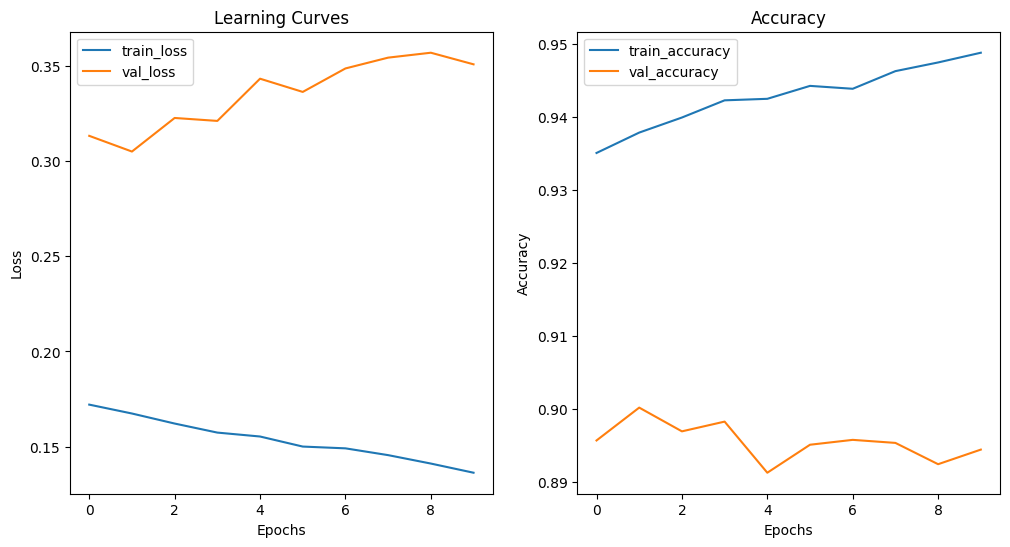

In [75]:
plot_curves(history_adam)

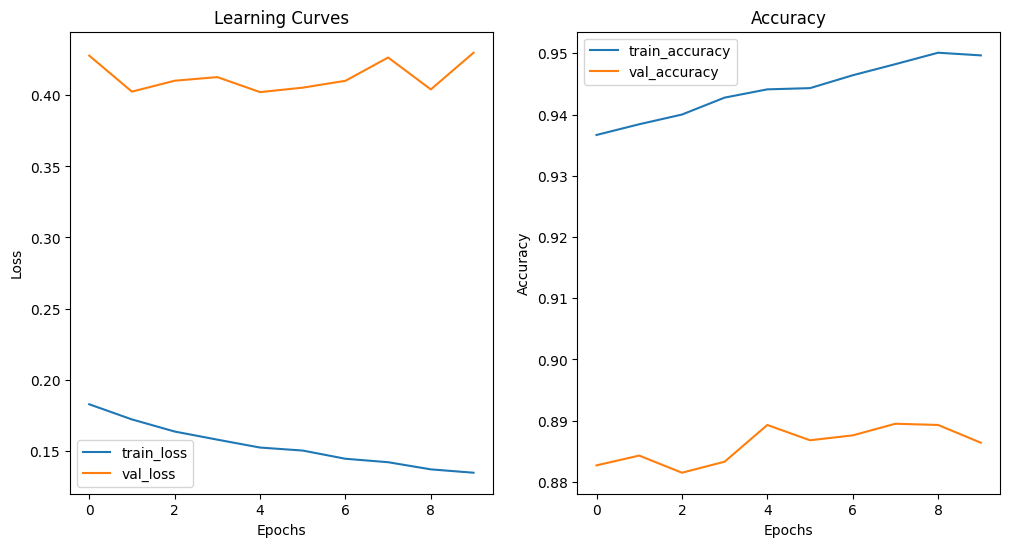

In [76]:
plot_curves(history_Callbacks)

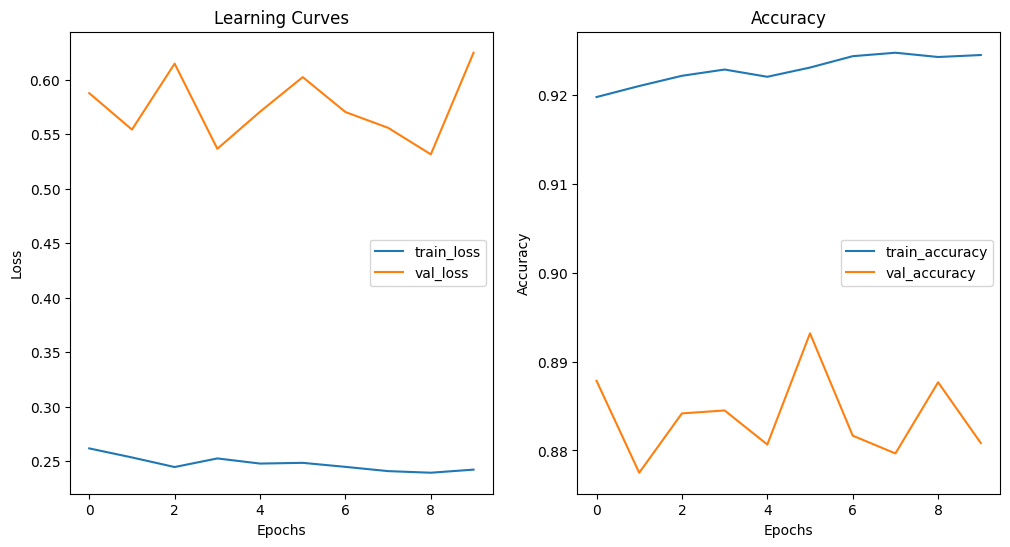

In [77]:
plot_curves(history_RMSProp)

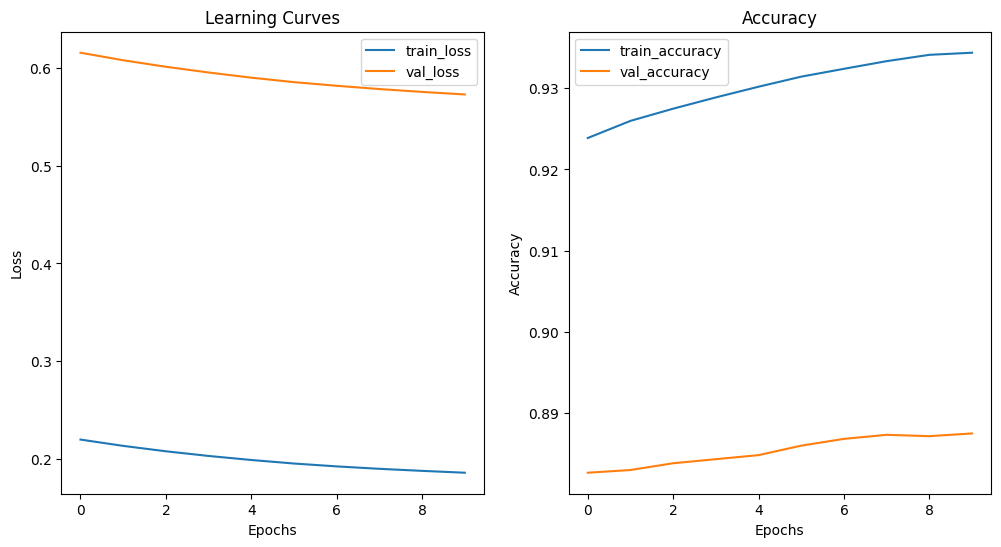

In [78]:
plot_curves(history_Adadelta)

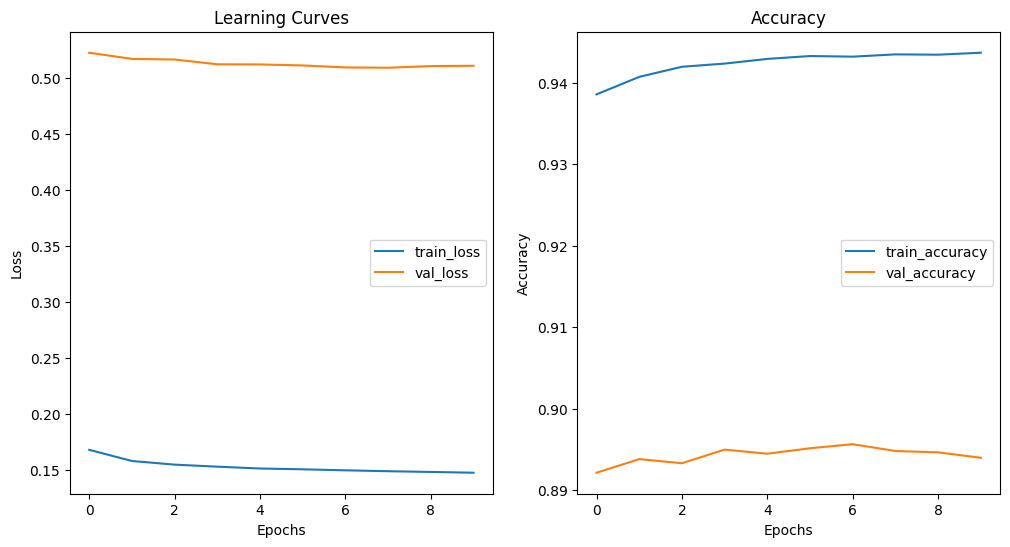

In [79]:
plot_curves(history_Adagrad)

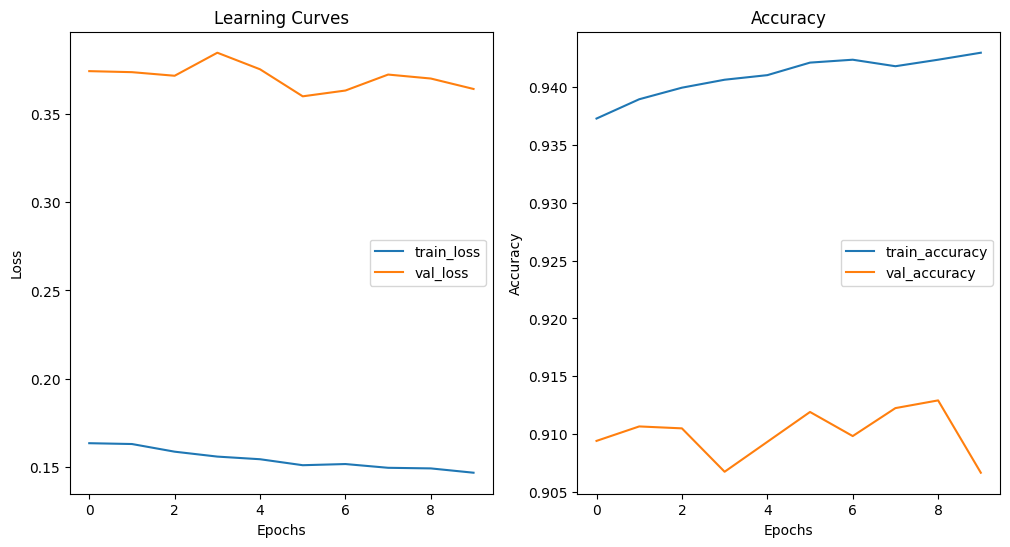

In [80]:
plot_curves(history_SGDNesterov)

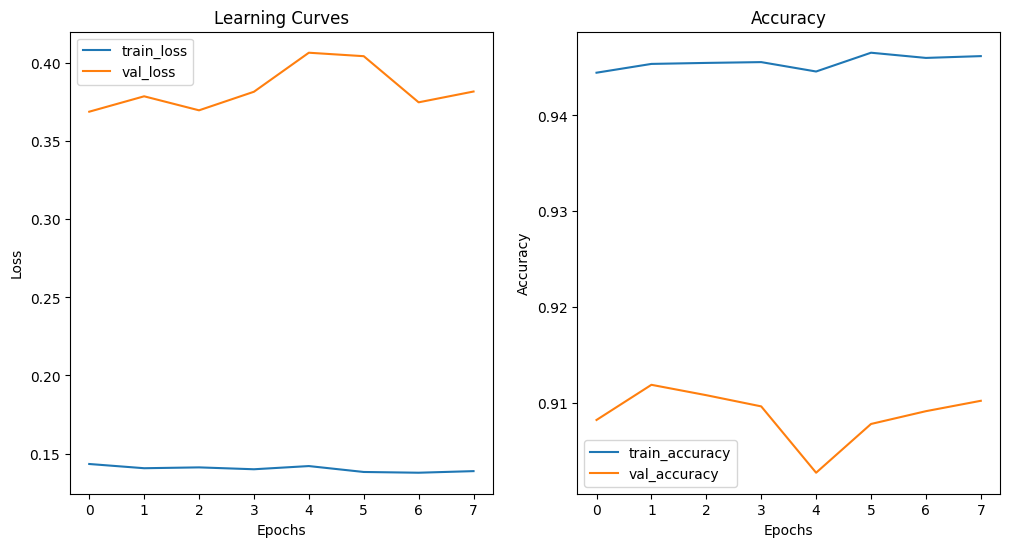

In [81]:
plot_curves(history_SGDMomentum)

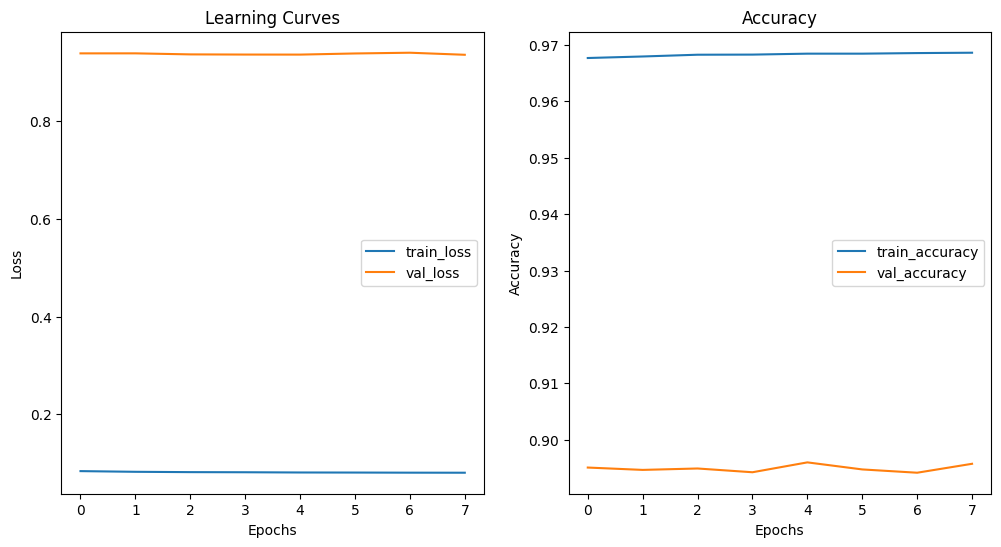

In [82]:
plot_curves(history_SGD)

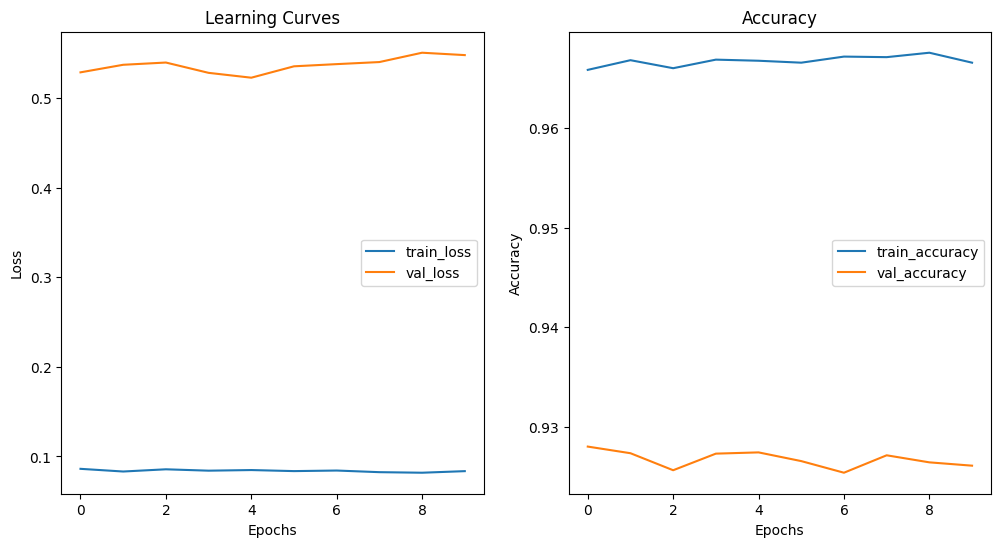

In [87]:
plot_curves(history)

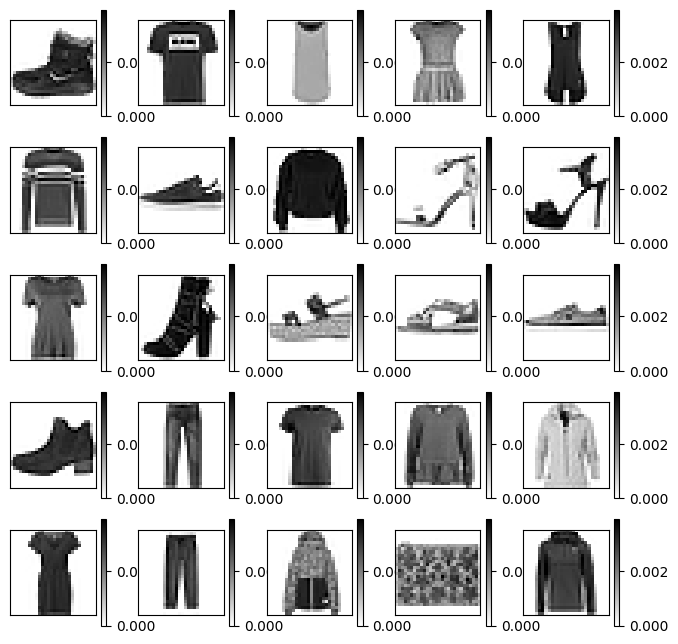

In [115]:
Categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)


# Алгоритм виконання

    Середовище:
        Набір даних Fashion-MNIST
        Надає агенту зображення та винагороду за правильну класифікацію
    Навчання:
        Ціль: максимізувати очікувану винагороду

Гіперпараметри:

    Кількість шарів:
        Експериментувати з 2-4 шарами
    Кількість нейронів:
        32-128 нейронів на шар
        Більше - > перенавчання
    Функції активації:
        ReLU, Sigmoid, Tanh        
    Кількість епох:
        10-20 епох
        Зупинка навчання, коли точність стабілізується
    Розмір батчу:
        32-128 зразків
    Оптимізатор:
        Adam, SGD
    Регуляризація:
        L2 регуляризація, Dropout

Техніки Reinforcement Learning:

    Функція втрати та метрика точності: - так
        зворотнє поширення момилки
    Q-learning: - ні
        Оцінює дію на основі очікуваної винагороди
    Deep Q-learning: - ні
        Використовує DNN для оцінки Q-функції
    Policy Gradients: - для CNN
        Оновлює політику агента безпосередньо

Архітектурні зміни:

    додавання з'єднань, зміну розміру шарів, зміну послідовності шарів
        значно не покращують результат.

# CNN

additional test

In [121]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model_cnn.summary())

# 1. Згортковий шар з 32 фільтрами розміру 3x3 та активацією ReLU
# 2. Макс-пулінг з кроком 2x2
# 3. Згортковий шар з 64 фільтрами розміру 3x3 та активацією ReLU
# 4. Макс-пулінг з кроком 2x2
# 5. Перетворення даних в одномірний вектор
# 6. Щільний шар на 256 нейронів з активацією ReLU
# 7. Щільний шар на 10 нейронів з активацією softmax



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [128]:

# Компіляція моделі
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2, beta_1=0.95)
model_cnn.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

# Навчання моделі
history_cnn = model_cnn.fit(train_images, train_labels, epochs=5, batch_size = 128, verbose = 1, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 42s 97ms/step - loss: 0.3572 - accuracy: 0.8680 - val_loss: 0.3316 - val_accuracy: 0.8775
Epoch 2/5
422/422 [==============================] - 36s 85ms/step - loss: 0.3346 - accuracy: 0.8747 - val_loss: 0.3571 - val_accuracy: 0.8702
Epoch 3/5
422/422 [==============================] - 35s 84ms/step - loss: 0.3177 - accuracy: 0.8809 - val_loss: 0.3291 - val_accuracy: 0.8780
Epoch 4/5
422/422 [==============================] - 35s 82ms/step - loss: 0.3036 - accuracy: 0.8875 - val_loss: 0.3184 - val_accuracy: 0.8790
Epoch 5/5
422/422 [==============================] - 36s 85ms/step - loss: 0.2969 - accuracy: 0.8898 - val_loss: 0.3159 - val_accuracy: 0.8815


In [129]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc_cnn)

313/313 [==============================] - 2s 7ms/step - loss: 0.3378 - accuracy: 0.8766
Точність на тестових даних: 0.8766000270843506


In [130]:
train_loss_cnn, train_acc_cnn = model_cnn.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc_cnn)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.2861 - accuracy: 0.8925
Точність на тренувальних даних: 0.892549991607666


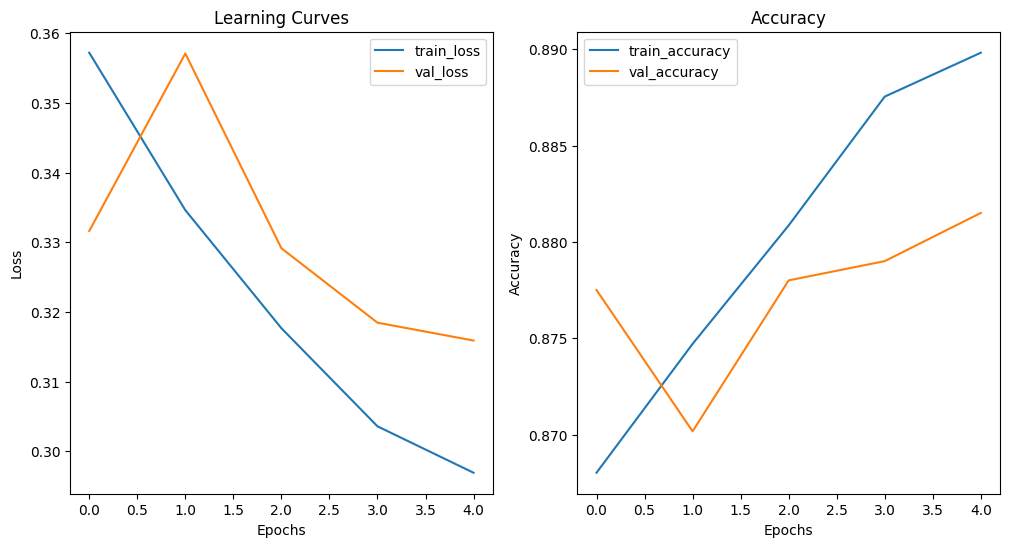

In [131]:
plot_curves(history_cnn)